NAME: Ankith Vijay  
Student ID: 862394125

# TASK 1: Write the code for downloading and formatting the data.
The below code downloads the dataset from the provided URL and the read the data and labels. It then performs one hot encoding on the labels and then the data is formatted under format_data() function.

In [ ]:
import urllib.request
import time
import os
import matplotlib.pyplot as plt
import gzip
import numpy as np

def download_data():
    if not os.path.exists("data"):
        os.mkdir("data")
    files = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]
    for file in files:
        if not os.path.exists(f"data/{file}"):
            url = f"http://yann.lecun.com/exdb/mnist/{file}"
            print(f"Downloading {url}")
            urllib.request.urlretrieve(url, f"data/{file}")
        else:
            print(f"File {file} already exists")

def read_data(filename):
    with gzip.open(filename, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 784)

def read_labels(filename):
    with gzip.open(filename, "rb") as f:
        labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return labels

def one_hot_encode(labels):
    one_hot_labels = np.zeros((len(labels), 10))
    for i, label in enumerate(labels):
        one_hot_labels[i][label] = 1
    return one_hot_labels

def format_data():
    download_data()
    train_data = read_data("data/train-images-idx3-ubyte.gz")
    train_labels = read_labels("data/train-labels-idx1-ubyte.gz")
    test_data = read_data("data/t10k-images-idx3-ubyte.gz")
    test_labels = read_labels("data/t10k-labels-idx1-ubyte.gz")
    train_labels = one_hot_encode(train_labels)
    test_labels = one_hot_encode(test_labels)
    return train_data, train_labels, test_data, test_labels


# TASK 2: Write the code for minibatch SGD implementation for your linear MNIST classifier
Below is the code for minibatch SGD implementation for linear MNIST Classifier.

In [ ]:
train_data, train_labels, test_data, test_labels = format_data()
W = np.zeros((10, 784))
def func(x):
    return np.dot(W, x)

def pred(x):
    f = func(x)
    return np.argmax(f)

def acrcy(data, labels):
    num_correct = 0
    for i, x in enumerate(data):
        if pred(x) == np.argmax(labels[i]):
            num_correct += 1
    return num_correct / len(data)

File train-images-idx3-ubyte.gz already exists
File train-labels-idx1-ubyte.gz already exists
File t10k-images-idx3-ubyte.gz already exists
File t10k-labels-idx1-ubyte.gz already exists


In [ ]:
def mb_sgd(train_data, train_labels, batch_size, learning_rate, num_epochs,W):

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    
    for t in range(num_epochs):

        permutation = np.random.permutation(len(train_data))
        train_data = train_data[permutation]
        train_labels = train_labels[permutation]


        for i in range(0, len(train_data), batch_size):

            batch_data = train_data[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]

            gradients = np.zeros((10, 784))
            loss = 0.0
            for j in range(len(batch_data)):
                x = batch_data[j]
                y = batch_labels[j]
                f = func(x)
                y_hat = np.zeros(10)
                y_hat[np.argmax(f)] = 1
                gradients += np.outer(y_hat - y, x)
                loss += np.linalg.norm(y_hat - y)**2
            gradients /= len(batch_data)

            W -= learning_rate * gradients

        # train_acc = acrcy(train_data, train_labels)
        test_acc = acrcy(test_data, test_labels)
        
        train_loss_list.append(loss)
        #train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        # Print acrcy and loss every 10 iterations
        if (t+1) % 10 == 0:
            print(f"Iteration {t+1} - Test acrcy: {test_acc:.4f}, loss: {loss:.4f}")
    W_FINAL = W
    
    
    # plt.plot(range(num_epochs) , train_loss_list, label='Train Loss')
    # # plt.plot(range(num_epochs) , train_acc_list, label='Train acrcy')
    # plt.plot(range(num_epochs) , test_acc_list, label='Test acrcy')
    # plt.legend()
    # plt.show()
    
    # Plot Training Loss
    plt.plot(range(num_epochs), train_loss_list, label='Train Loss')
    plt.legend()
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Plot Test acrcy
    plt.plot(range(num_epochs), test_acc_list, label='Test acrcy')
    plt.legend()
    plt.title('Test acrcy')
    plt.xlabel('Epochs')
    plt.ylabel('acrcy')
    plt.show()

    return W_FINAL


TASK 3: 
The role of batch size: Run your code with batch sizes B = 1, 10, 100, 1000. For each batch size,
determine a good choice of learning rate

*   Determine a good choice of learning rate
*   pick ITR sufficiently large to ensure the (approximate) convergence of the training loss
*   Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis)
*   Report how long the training takes (in seconds).
*   Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis)

ANSWER:


1. Learning Rate best Suitable for my code is 0.001
2. ITR is 100 as im not seeing any significant change after that iteration
3. Below is the plot for loss on the respective batch size and learning rate
4. Under each implementation, the execution time is shown
5. Below is the plot for the accuracy on the respective batch size and learning rate




Experimenting with batch size 1
Learning rate: 0.001
Iteration 10 - Test accuracy: 0.9034, loss: 0.0000
Iteration 20 - Test accuracy: 0.8944, loss: 0.0000
Iteration 30 - Test accuracy: 0.8738, loss: 2.0000
Iteration 40 - Test accuracy: 0.8674, loss: 0.0000
Iteration 50 - Test accuracy: 0.8954, loss: 0.0000
Iteration 60 - Test accuracy: 0.8712, loss: 0.0000
Iteration 70 - Test accuracy: 0.8864, loss: 0.0000
Iteration 80 - Test accuracy: 0.9003, loss: 0.0000
Iteration 90 - Test accuracy: 0.8950, loss: 0.0000
Iteration 100 - Test accuracy: 0.8637, loss: 0.0000


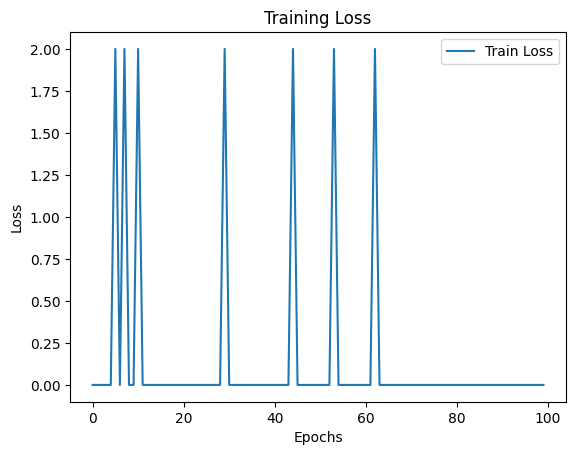

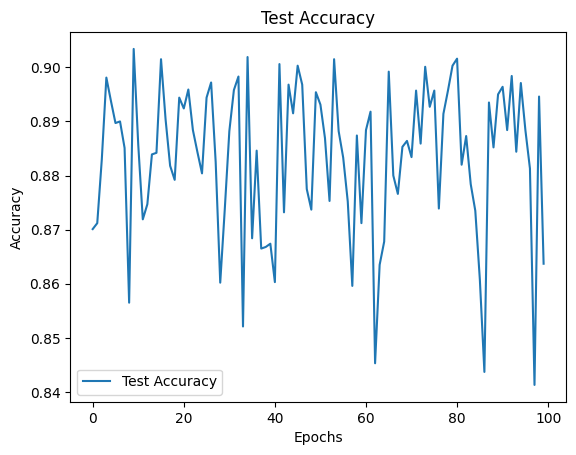

Training time: 387.47 seconds
Learning rate: 0.01
Iteration 10 - Test accuracy: 0.8968, loss: 0.0000
Iteration 20 - Test accuracy: 0.8832, loss: 0.0000
Iteration 30 - Test accuracy: 0.8974, loss: 0.0000
Iteration 40 - Test accuracy: 0.8851, loss: 2.0000
Iteration 50 - Test accuracy: 0.8820, loss: 0.0000
Iteration 60 - Test accuracy: 0.8761, loss: 0.0000
Iteration 70 - Test accuracy: 0.9006, loss: 2.0000
Iteration 80 - Test accuracy: 0.8884, loss: 0.0000
Iteration 90 - Test accuracy: 0.8919, loss: 0.0000
Iteration 100 - Test accuracy: 0.8904, loss: 0.0000


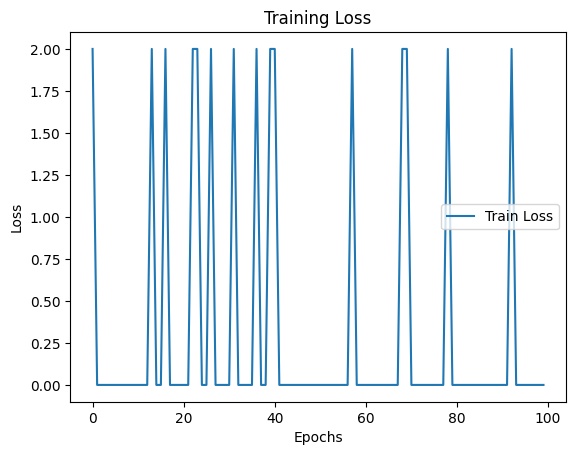

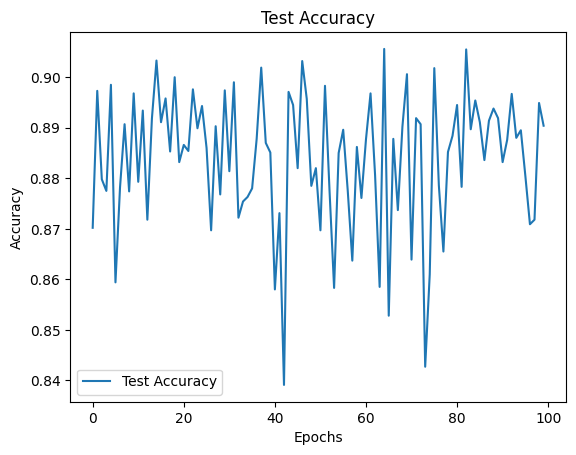

Training time: 393.58 seconds
Learning rate: 0.1
Iteration 10 - Test accuracy: 0.8872, loss: 0.0000
Iteration 20 - Test accuracy: 0.8782, loss: 0.0000
Iteration 30 - Test accuracy: 0.8815, loss: 0.0000
Iteration 40 - Test accuracy: 0.8857, loss: 0.0000
Iteration 50 - Test accuracy: 0.8929, loss: 2.0000
Iteration 60 - Test accuracy: 0.8832, loss: 0.0000
Iteration 70 - Test accuracy: 0.8868, loss: 0.0000
Iteration 80 - Test accuracy: 0.8756, loss: 2.0000
Iteration 90 - Test accuracy: 0.8775, loss: 0.0000
Iteration 100 - Test accuracy: 0.9004, loss: 0.0000


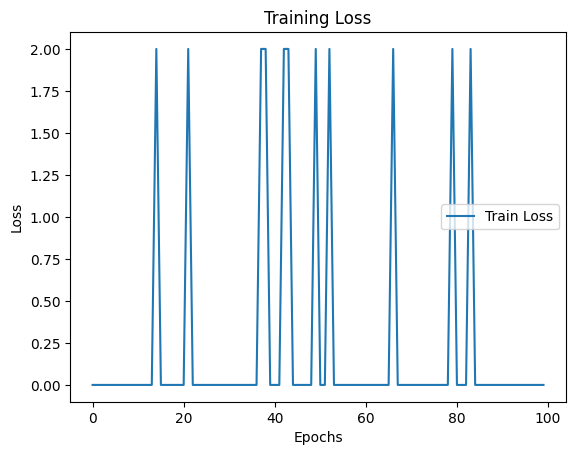

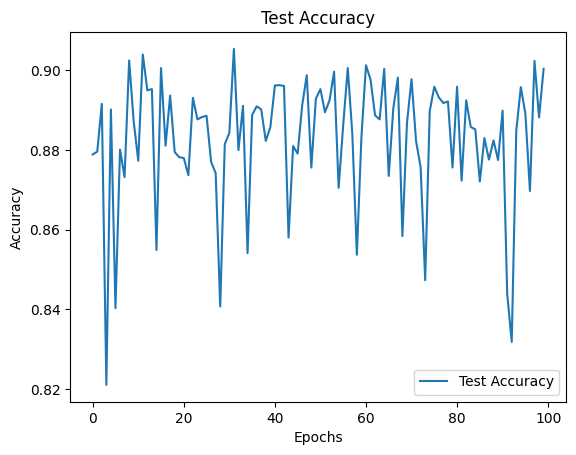

Training time: 391.05 seconds
Learning rate: 1
Iteration 10 - Test accuracy: 0.8768, loss: 0.0000
Iteration 20 - Test accuracy: 0.8858, loss: 0.0000
Iteration 30 - Test accuracy: 0.8956, loss: 0.0000
Iteration 40 - Test accuracy: 0.8622, loss: 0.0000
Iteration 50 - Test accuracy: 0.8888, loss: 0.0000
Iteration 60 - Test accuracy: 0.8878, loss: 0.0000
Iteration 70 - Test accuracy: 0.8751, loss: 0.0000
Iteration 80 - Test accuracy: 0.8754, loss: 0.0000
Iteration 90 - Test accuracy: 0.8852, loss: 0.0000
Iteration 100 - Test accuracy: 0.8854, loss: 2.0000


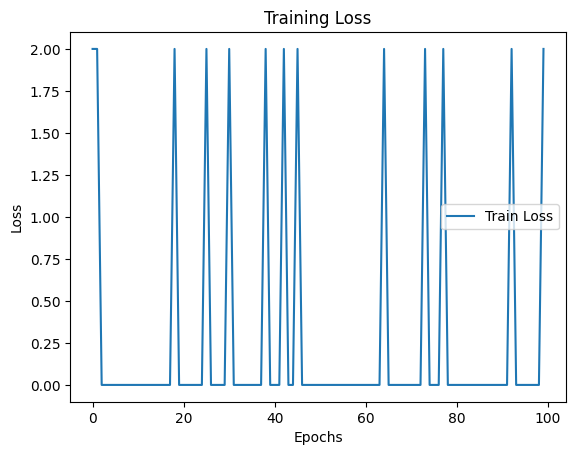

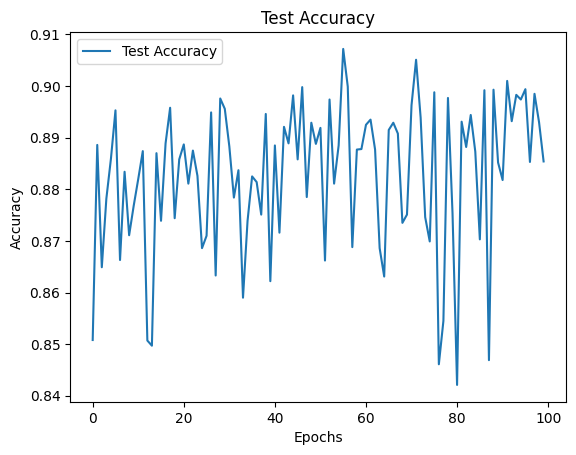

Training time: 401.47 seconds
Experimenting with batch size 10
Learning rate: 0.001
Iteration 10 - Test accuracy: 0.9012, loss: 4.0000
Iteration 20 - Test accuracy: 0.9051, loss: 0.0000
Iteration 30 - Test accuracy: 0.9085, loss: 2.0000
Iteration 40 - Test accuracy: 0.9098, loss: 0.0000
Iteration 50 - Test accuracy: 0.9106, loss: 0.0000
Iteration 60 - Test accuracy: 0.9115, loss: 2.0000
Iteration 70 - Test accuracy: 0.9122, loss: 4.0000
Iteration 80 - Test accuracy: 0.9123, loss: 0.0000
Iteration 90 - Test accuracy: 0.9121, loss: 0.0000
Iteration 100 - Test accuracy: 0.9125, loss: 0.0000


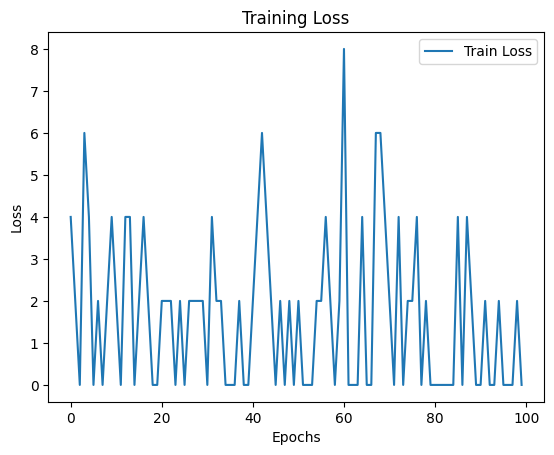

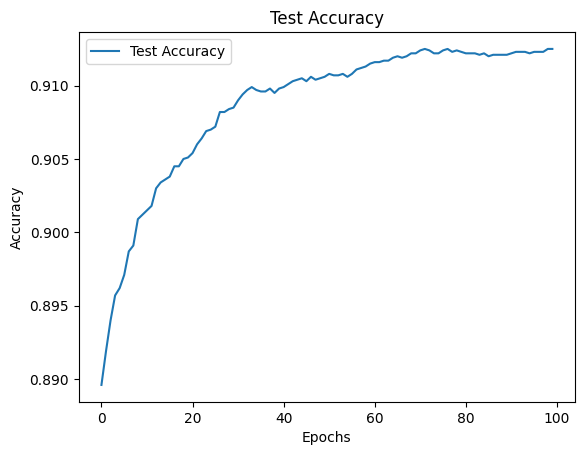

Training time: 258.84 seconds
Learning rate: 0.01
Iteration 10 - Test accuracy: 0.9142, loss: 0.0000
Iteration 20 - Test accuracy: 0.9157, loss: 0.0000
Iteration 30 - Test accuracy: 0.9157, loss: 0.0000
Iteration 40 - Test accuracy: 0.9158, loss: 2.0000
Iteration 50 - Test accuracy: 0.9161, loss: 0.0000
Iteration 60 - Test accuracy: 0.9153, loss: 4.0000
Iteration 70 - Test accuracy: 0.9155, loss: 0.0000
Iteration 80 - Test accuracy: 0.9149, loss: 0.0000
Iteration 90 - Test accuracy: 0.9152, loss: 0.0000
Iteration 100 - Test accuracy: 0.9148, loss: 0.0000


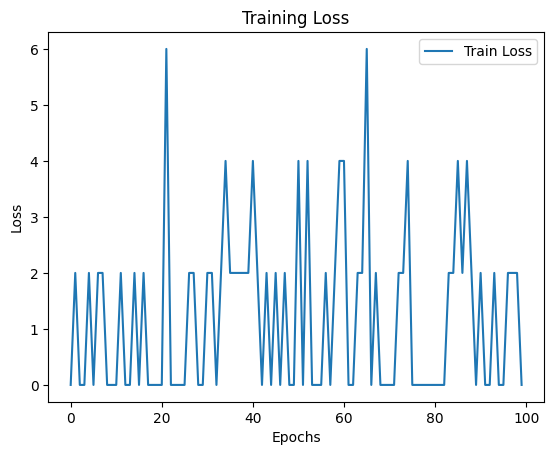

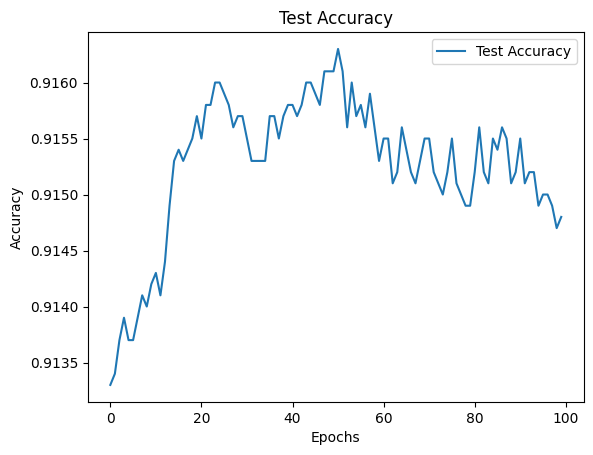

Training time: 248.83 seconds
Learning rate: 0.1
Iteration 10 - Test accuracy: 0.9122, loss: 2.0000
Iteration 20 - Test accuracy: 0.9099, loss: 2.0000
Iteration 30 - Test accuracy: 0.9059, loss: 0.0000
Iteration 40 - Test accuracy: 0.9068, loss: 0.0000
Iteration 50 - Test accuracy: 0.9051, loss: 0.0000
Iteration 60 - Test accuracy: 0.9061, loss: 2.0000
Iteration 70 - Test accuracy: 0.9043, loss: 0.0000
Iteration 80 - Test accuracy: 0.9040, loss: 0.0000
Iteration 90 - Test accuracy: 0.9045, loss: 2.0000
Iteration 100 - Test accuracy: 0.9030, loss: 0.0000


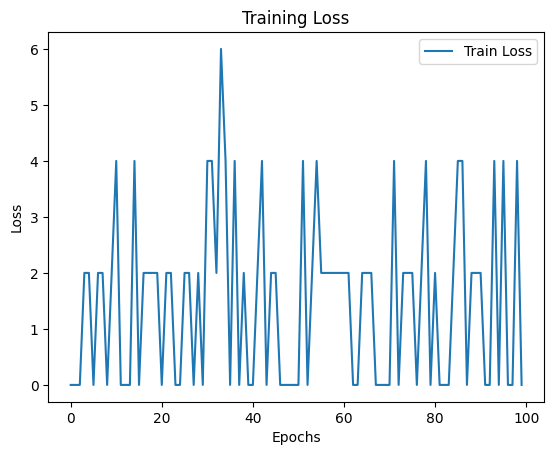

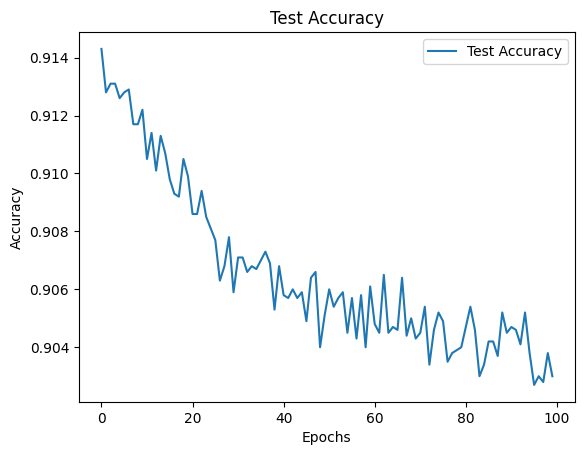

Training time: 252.49 seconds
Learning rate: 1
Iteration 10 - Test accuracy: 0.8993, loss: 0.0000
Iteration 20 - Test accuracy: 0.8961, loss: 0.0000
Iteration 30 - Test accuracy: 0.9013, loss: 2.0000
Iteration 40 - Test accuracy: 0.8896, loss: 0.0000
Iteration 50 - Test accuracy: 0.9012, loss: 0.0000
Iteration 60 - Test accuracy: 0.8945, loss: 0.0000
Iteration 70 - Test accuracy: 0.8939, loss: 0.0000
Iteration 80 - Test accuracy: 0.8846, loss: 2.0000
Iteration 90 - Test accuracy: 0.8767, loss: 4.0000
Iteration 100 - Test accuracy: 0.8904, loss: 0.0000


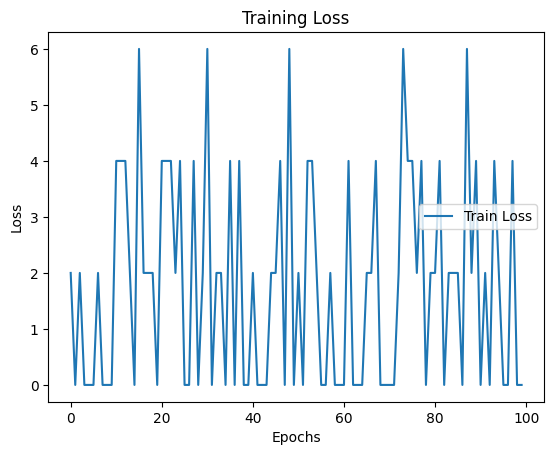

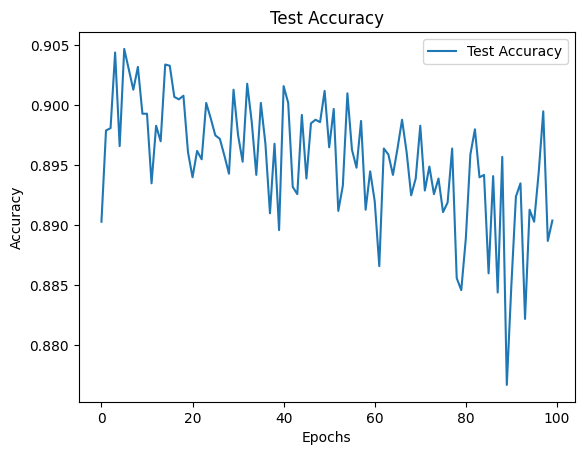

Training time: 261.97 seconds
Experimenting with batch size 100
Learning rate: 0.001
Iteration 10 - Test accuracy: 0.8987, loss: 18.0000
Iteration 20 - Test accuracy: 0.9007, loss: 10.0000
Iteration 30 - Test accuracy: 0.9024, loss: 16.0000
Iteration 40 - Test accuracy: 0.9021, loss: 16.0000
Iteration 50 - Test accuracy: 0.9023, loss: 10.0000
Iteration 60 - Test accuracy: 0.9029, loss: 16.0000
Iteration 70 - Test accuracy: 0.9033, loss: 16.0000
Iteration 80 - Test accuracy: 0.9033, loss: 20.0000
Iteration 90 - Test accuracy: 0.9033, loss: 18.0000
Iteration 100 - Test accuracy: 0.9035, loss: 16.0000


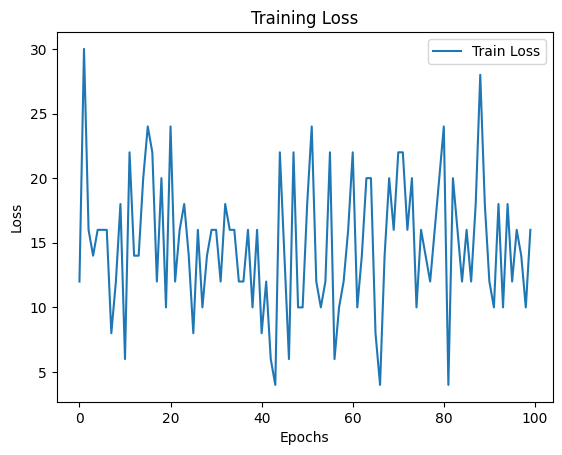

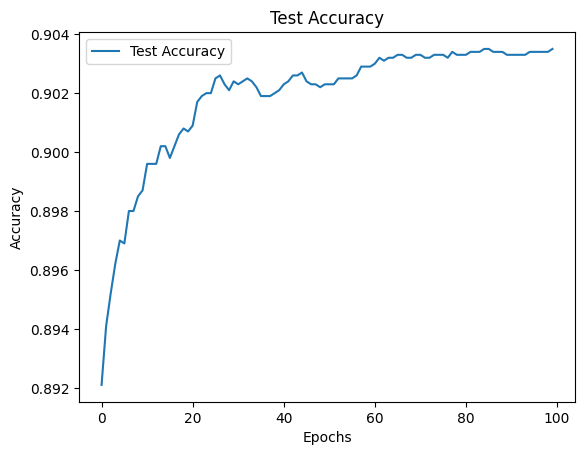

Training time: 249.85 seconds
Learning rate: 0.01
Iteration 10 - Test accuracy: 0.9046, loss: 18.0000
Iteration 20 - Test accuracy: 0.9042, loss: 22.0000
Iteration 30 - Test accuracy: 0.9039, loss: 8.0000
Iteration 40 - Test accuracy: 0.9041, loss: 8.0000
Iteration 50 - Test accuracy: 0.9041, loss: 20.0000
Iteration 60 - Test accuracy: 0.9033, loss: 8.0000
Iteration 70 - Test accuracy: 0.9033, loss: 14.0000
Iteration 80 - Test accuracy: 0.9032, loss: 10.0000
Iteration 90 - Test accuracy: 0.9032, loss: 30.0000
Iteration 100 - Test accuracy: 0.9028, loss: 18.0000


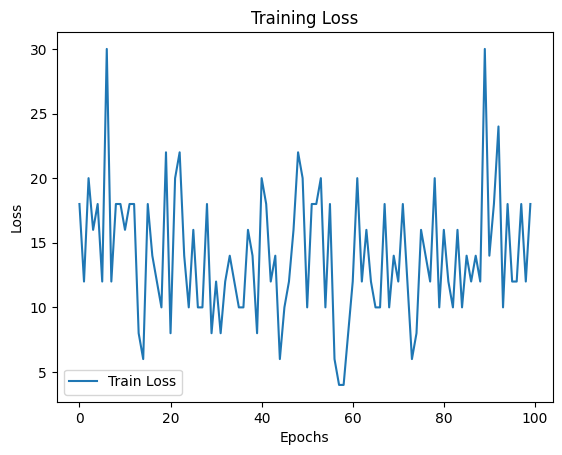

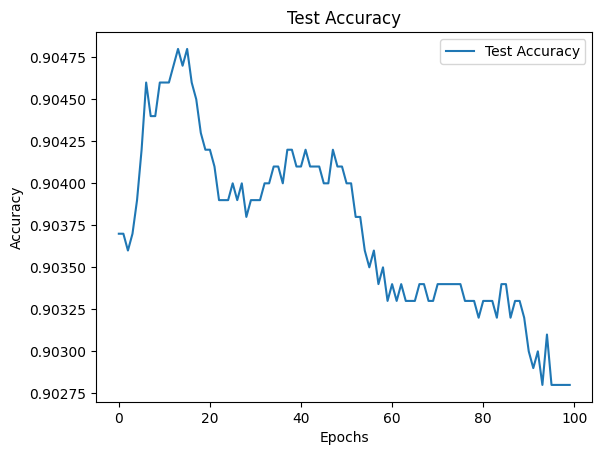

Training time: 245.40 seconds
Learning rate: 0.1
Iteration 10 - Test accuracy: 0.9021, loss: 4.0000
Iteration 20 - Test accuracy: 0.9014, loss: 16.0000
Iteration 30 - Test accuracy: 0.9015, loss: 18.0000
Iteration 40 - Test accuracy: 0.9011, loss: 16.0000
Iteration 50 - Test accuracy: 0.9007, loss: 10.0000
Iteration 60 - Test accuracy: 0.9002, loss: 12.0000
Iteration 70 - Test accuracy: 0.8999, loss: 10.0000
Iteration 80 - Test accuracy: 0.8997, loss: 12.0000
Iteration 90 - Test accuracy: 0.9000, loss: 20.0000
Iteration 100 - Test accuracy: 0.8990, loss: 10.0000


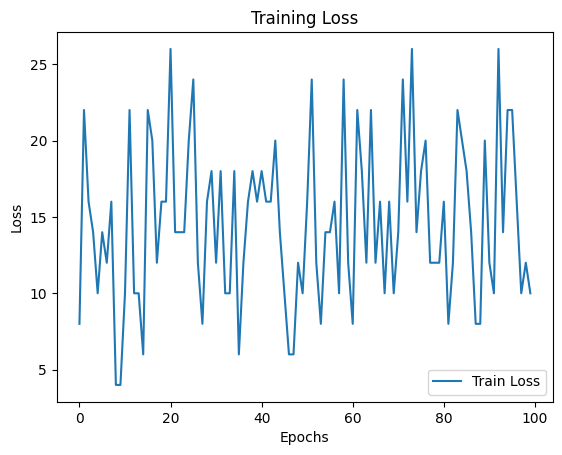

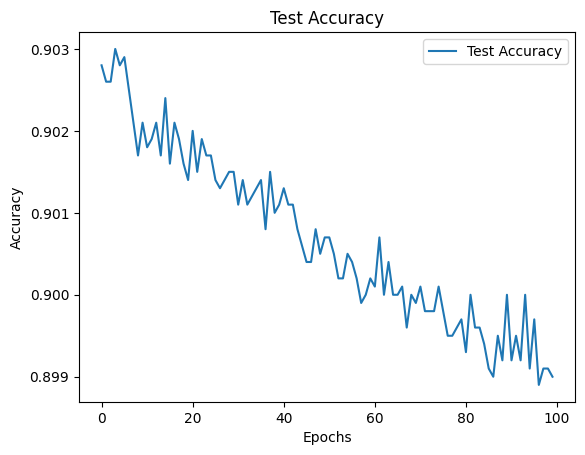

Training time: 249.71 seconds
Learning rate: 1
Iteration 10 - Test accuracy: 0.8985, loss: 22.0000
Iteration 20 - Test accuracy: 0.8977, loss: 8.0000
Iteration 30 - Test accuracy: 0.8969, loss: 16.0000
Iteration 40 - Test accuracy: 0.8950, loss: 14.0000
Iteration 50 - Test accuracy: 0.8967, loss: 14.0000
Iteration 60 - Test accuracy: 0.8949, loss: 18.0000
Iteration 70 - Test accuracy: 0.8954, loss: 24.0000
Iteration 80 - Test accuracy: 0.8943, loss: 10.0000
Iteration 90 - Test accuracy: 0.8950, loss: 20.0000
Iteration 100 - Test accuracy: 0.8957, loss: 22.0000


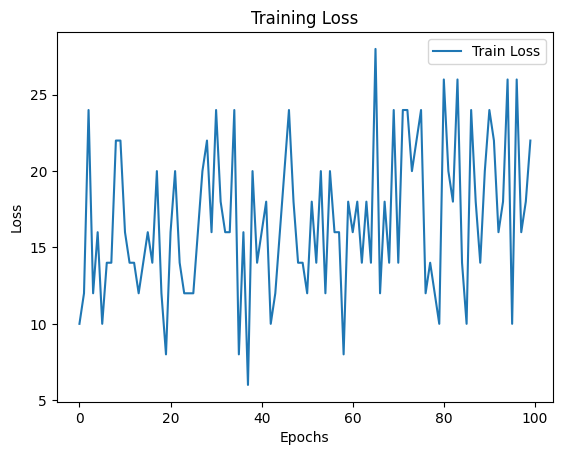

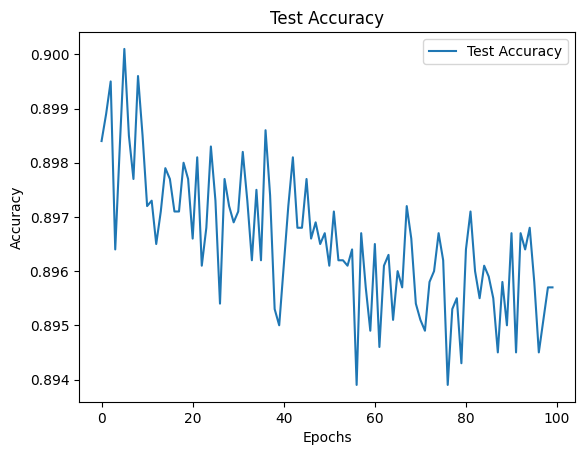

Training time: 246.67 seconds
Experimenting with batch size 1000
Learning rate: 0.001
Iteration 10 - Test accuracy: 0.8957, loss: 140.0000
Iteration 20 - Test accuracy: 0.8958, loss: 158.0000
Iteration 30 - Test accuracy: 0.8952, loss: 166.0000
Iteration 40 - Test accuracy: 0.8956, loss: 164.0000
Iteration 50 - Test accuracy: 0.8956, loss: 170.0000
Iteration 60 - Test accuracy: 0.8956, loss: 140.0000
Iteration 70 - Test accuracy: 0.8956, loss: 168.0000
Iteration 80 - Test accuracy: 0.8957, loss: 124.0000
Iteration 90 - Test accuracy: 0.8957, loss: 118.0000
Iteration 100 - Test accuracy: 0.8956, loss: 156.0000


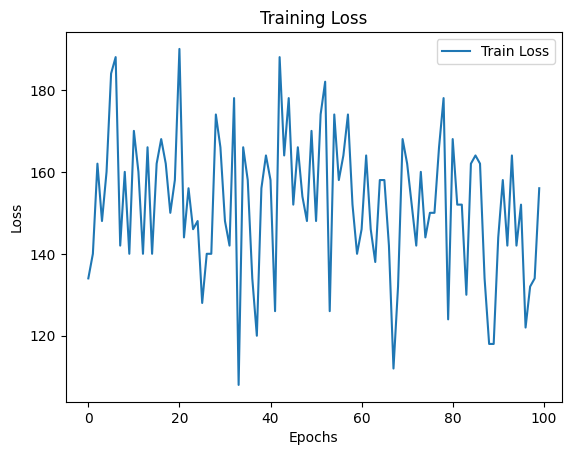

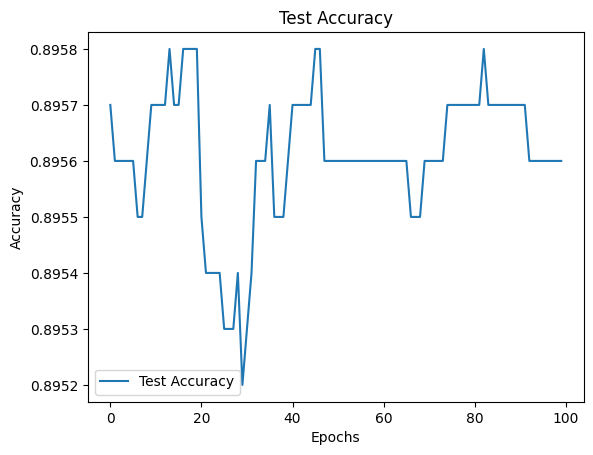

Training time: 249.68 seconds
Learning rate: 0.01
Iteration 10 - Test accuracy: 0.8961, loss: 160.0000
Iteration 20 - Test accuracy: 0.8965, loss: 152.0000
Iteration 30 - Test accuracy: 0.8964, loss: 146.0000
Iteration 40 - Test accuracy: 0.8963, loss: 148.0000
Iteration 50 - Test accuracy: 0.8963, loss: 156.0000
Iteration 60 - Test accuracy: 0.8962, loss: 152.0000
Iteration 70 - Test accuracy: 0.8962, loss: 140.0000
Iteration 80 - Test accuracy: 0.8963, loss: 134.0000
Iteration 90 - Test accuracy: 0.8962, loss: 174.0000
Iteration 100 - Test accuracy: 0.8964, loss: 148.0000


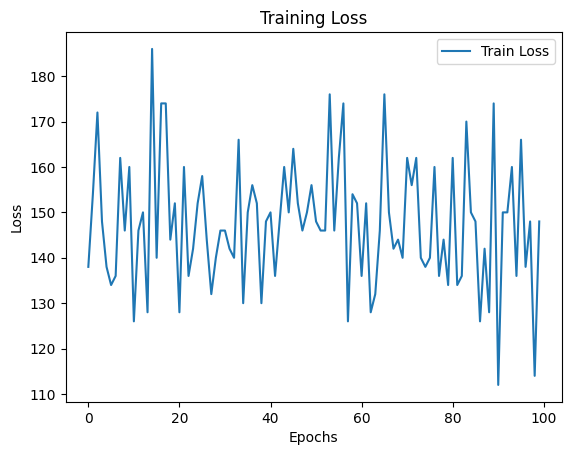

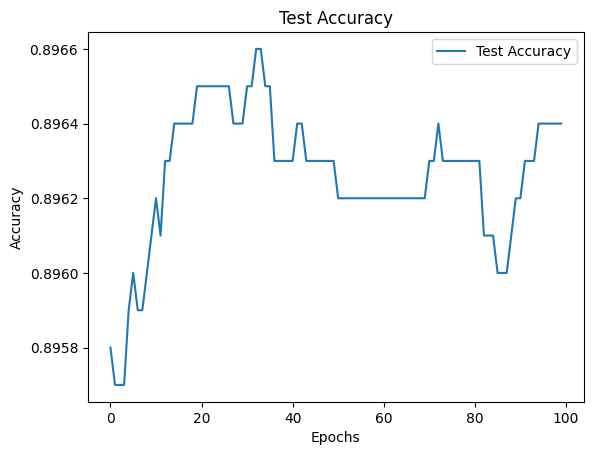

Training time: 235.68 seconds
Learning rate: 0.1
Iteration 10 - Test accuracy: 0.8963, loss: 124.0000
Iteration 20 - Test accuracy: 0.8957, loss: 158.0000
Iteration 30 - Test accuracy: 0.8954, loss: 162.0000
Iteration 40 - Test accuracy: 0.8953, loss: 152.0000
Iteration 50 - Test accuracy: 0.8952, loss: 138.0000
Iteration 60 - Test accuracy: 0.8951, loss: 164.0000
Iteration 70 - Test accuracy: 0.8953, loss: 162.0000
Iteration 80 - Test accuracy: 0.8951, loss: 130.0000
Iteration 90 - Test accuracy: 0.8948, loss: 130.0000
Iteration 100 - Test accuracy: 0.8948, loss: 146.0000


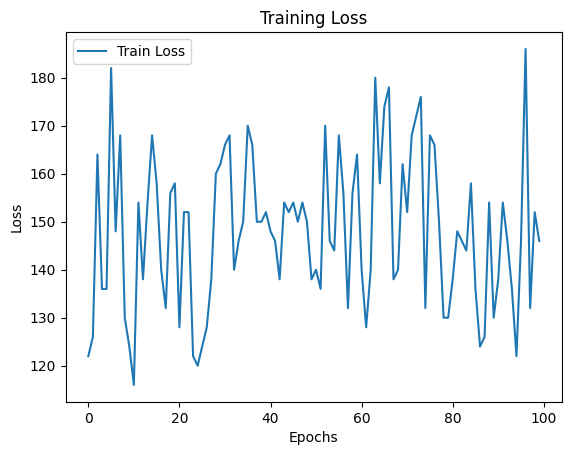

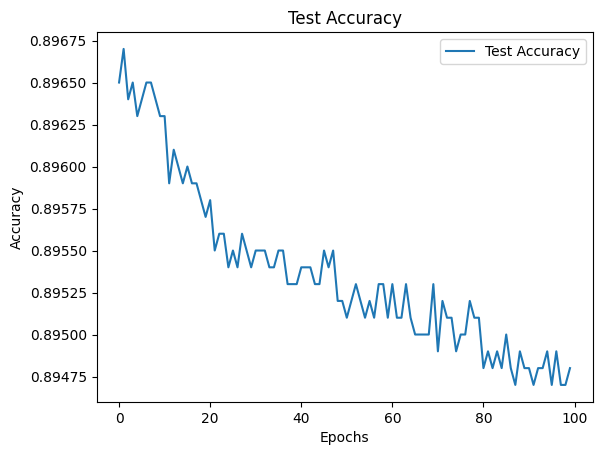

Training time: 232.39 seconds
Learning rate: 1
Iteration 10 - Test accuracy: 0.8956, loss: 172.0000
Iteration 20 - Test accuracy: 0.8949, loss: 172.0000
Iteration 30 - Test accuracy: 0.8948, loss: 164.0000
Iteration 40 - Test accuracy: 0.8946, loss: 170.0000
Iteration 50 - Test accuracy: 0.8947, loss: 154.0000
Iteration 60 - Test accuracy: 0.8948, loss: 130.0000
Iteration 70 - Test accuracy: 0.8950, loss: 166.0000
Iteration 80 - Test accuracy: 0.8943, loss: 160.0000
Iteration 90 - Test accuracy: 0.8950, loss: 172.0000
Iteration 100 - Test accuracy: 0.8949, loss: 120.0000


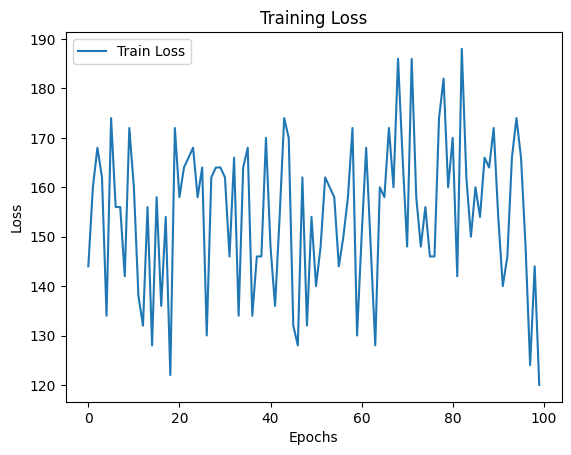

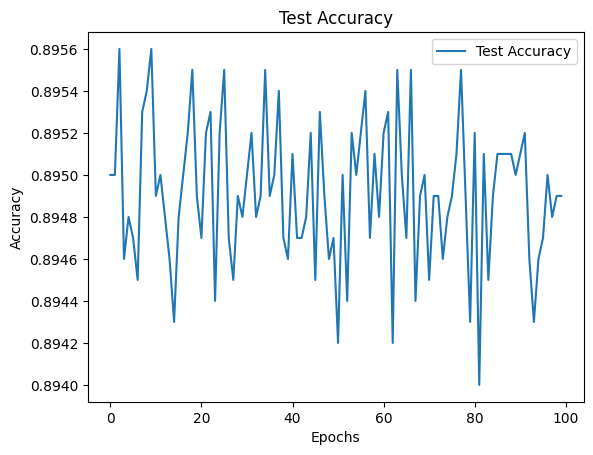

Training time: 239.58 seconds


In [ ]:
# W = mb_sgd(train_data, train_labels, 10, 0.001, 10, W)
# batch_sizes = [1, 10, 100, 1000]
# learning_rates = [0.0001, 0.01, 0.1, 1]
batch_sizes = [1, 10, 100, 1000]
learning_rates = [0.001, 0.01, 0.1, 1]
num_iterations = 100

for batch_size in batch_sizes:
    print(f"Experimenting with batch size {batch_size}")
    for learning_rate in learning_rates:
        print(f"Learning rate: {learning_rate}")
        start_time = time.time()
        W = mb_sgd(train_data, train_labels, batch_size, learning_rate, num_iterations, W)
        end_time = time.time()
        print(f"Training time: {end_time - start_time:.2f} seconds")

TASK 4: Comment on the role of batch size.

ANSWER: When the batch size is too small, the model may not be able to understand the patterns in the data and may overfit to the training data. This can lead to a lower accuracy on the set. On the other hand, when the batch size is too large, the model may not be able to capture the finer details of the data, leading to underfitting and lower accuracy.

The smaller the batch size, the more stochastic the training process becomes. This means that the model will be updated more frequently based on lesser samples, and the updates will be more hapazard. This can help the model escape local minima and converge to a better solution, but it can also lead to more fluctuations in the accuracy during training.

Smaller batch sizes require more updates to the model parameters, which can lead to slower training. Larger batch sizes, on the other hand, can lead to faster training but may require more memory and computational power.

TASK 5: The role of training dataset size: Let us reduce the training dataset size. Instead of N = 50,000, let us pick a subset S′ of size N′ from the original dataset without replacement and uniformly at random. Fix batch size to B = 100. Repeat the steps above for N ′ ∈ {100, 500, 1000, 10000}. Comment on the accuracy as a function of dataset size.

Below is the code for different batch sizes

Experimenting with training dataset size 100
Iteration 10 - Test accuracy: 0.8944, loss: 8.0000
Iteration 20 - Test accuracy: 0.8951, loss: 4.0000
Iteration 30 - Test accuracy: 0.8947, loss: 0.0000
Iteration 40 - Test accuracy: 0.8947, loss: 0.0000
Iteration 50 - Test accuracy: 0.8947, loss: 0.0000
Iteration 60 - Test accuracy: 0.8947, loss: 0.0000
Iteration 70 - Test accuracy: 0.8947, loss: 0.0000
Iteration 80 - Test accuracy: 0.8947, loss: 0.0000
Iteration 90 - Test accuracy: 0.8947, loss: 0.0000
Iteration 100 - Test accuracy: 0.8947, loss: 0.0000
Iteration 110 - Test accuracy: 0.8947, loss: 0.0000
Iteration 120 - Test accuracy: 0.8947, loss: 0.0000
Iteration 130 - Test accuracy: 0.8947, loss: 0.0000
Iteration 140 - Test accuracy: 0.8947, loss: 0.0000
Iteration 150 - Test accuracy: 0.8947, loss: 0.0000
Iteration 160 - Test accuracy: 0.8947, loss: 0.0000
Iteration 170 - Test accuracy: 0.8947, loss: 0.0000
Iteration 180 - Test accuracy: 0.8947, loss: 0.0000
Iteration 190 - Test accurac

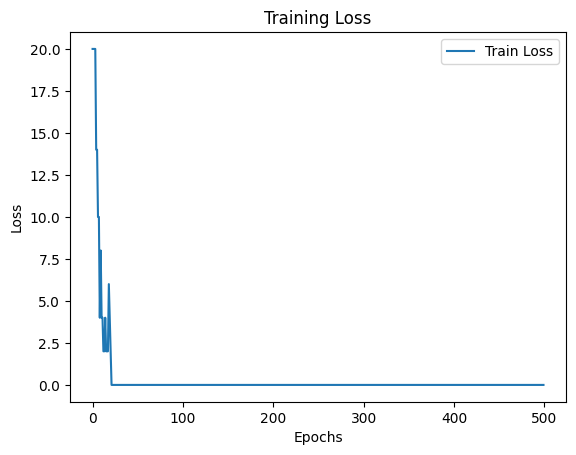

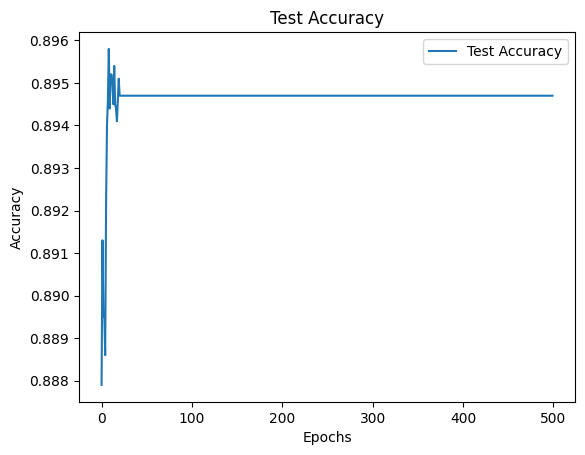

Training time: 50.69 seconds
Experimenting with training dataset size 500
Iteration 10 - Test accuracy: 0.9043, loss: 16.0000
Iteration 20 - Test accuracy: 0.9013, loss: 4.0000
Iteration 30 - Test accuracy: 0.8983, loss: 2.0000
Iteration 40 - Test accuracy: 0.8977, loss: 0.0000
Iteration 50 - Test accuracy: 0.8977, loss: 0.0000
Iteration 60 - Test accuracy: 0.8977, loss: 0.0000
Iteration 70 - Test accuracy: 0.8977, loss: 0.0000
Iteration 80 - Test accuracy: 0.8977, loss: 0.0000
Iteration 90 - Test accuracy: 0.8977, loss: 0.0000
Iteration 100 - Test accuracy: 0.8977, loss: 0.0000
Iteration 110 - Test accuracy: 0.8977, loss: 0.0000
Iteration 120 - Test accuracy: 0.8977, loss: 0.0000
Iteration 130 - Test accuracy: 0.8977, loss: 0.0000
Iteration 140 - Test accuracy: 0.8977, loss: 0.0000
Iteration 150 - Test accuracy: 0.8977, loss: 0.0000
Iteration 160 - Test accuracy: 0.8977, loss: 0.0000
Iteration 170 - Test accuracy: 0.8977, loss: 0.0000
Iteration 180 - Test accuracy: 0.8977, loss: 0.000

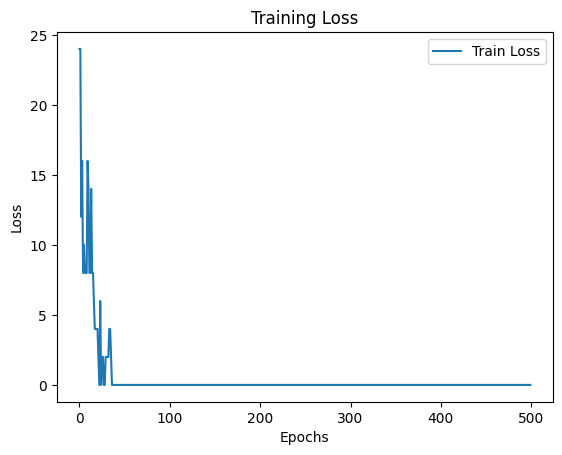

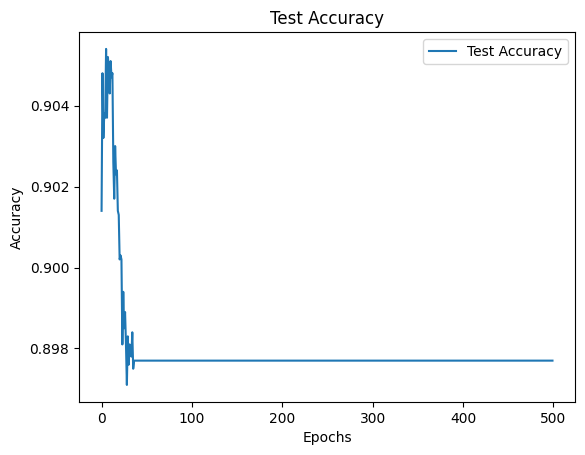

Training time: 57.24 seconds
Experimenting with training dataset size 1000
Iteration 10 - Test accuracy: 0.8968, loss: 16.0000
Iteration 20 - Test accuracy: 0.8903, loss: 8.0000
Iteration 30 - Test accuracy: 0.8835, loss: 8.0000
Iteration 40 - Test accuracy: 0.8831, loss: 2.0000
Iteration 50 - Test accuracy: 0.8796, loss: 4.0000
Iteration 60 - Test accuracy: 0.8762, loss: 2.0000
Iteration 70 - Test accuracy: 0.8738, loss: 2.0000
Iteration 80 - Test accuracy: 0.8718, loss: 4.0000
Iteration 90 - Test accuracy: 0.8695, loss: 0.0000
Iteration 100 - Test accuracy: 0.8702, loss: 2.0000
Iteration 110 - Test accuracy: 0.8687, loss: 0.0000
Iteration 120 - Test accuracy: 0.8687, loss: 0.0000
Iteration 130 - Test accuracy: 0.8687, loss: 0.0000
Iteration 140 - Test accuracy: 0.8687, loss: 0.0000
Iteration 150 - Test accuracy: 0.8687, loss: 0.0000
Iteration 160 - Test accuracy: 0.8687, loss: 0.0000
Iteration 170 - Test accuracy: 0.8687, loss: 0.0000
Iteration 180 - Test accuracy: 0.8687, loss: 0.00

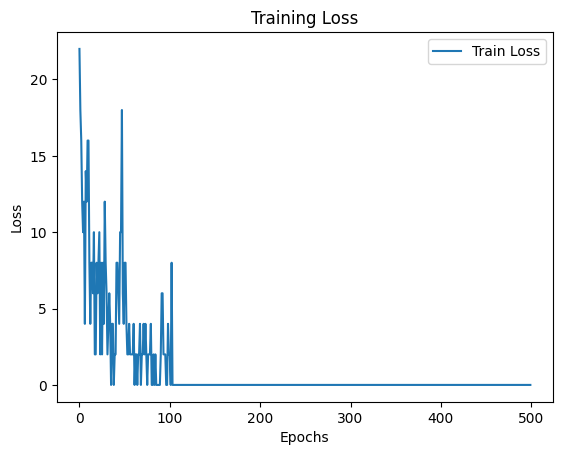

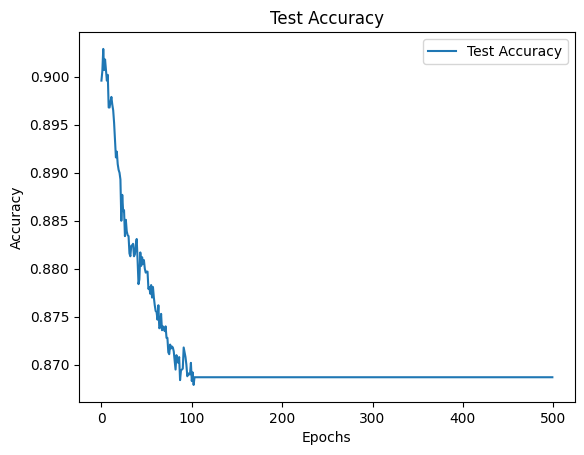

Training time: 68.62 seconds
Experimenting with training dataset size 10000
Iteration 10 - Test accuracy: 0.9059, loss: 10.0000
Iteration 20 - Test accuracy: 0.8971, loss: 10.0000
Iteration 30 - Test accuracy: 0.8961, loss: 14.0000
Iteration 40 - Test accuracy: 0.8942, loss: 12.0000
Iteration 50 - Test accuracy: 0.8894, loss: 6.0000
Iteration 60 - Test accuracy: 0.8875, loss: 8.0000
Iteration 70 - Test accuracy: 0.8868, loss: 8.0000
Iteration 80 - Test accuracy: 0.8841, loss: 4.0000
Iteration 90 - Test accuracy: 0.8819, loss: 8.0000
Iteration 100 - Test accuracy: 0.8773, loss: 8.0000
Iteration 110 - Test accuracy: 0.8779, loss: 20.0000
Iteration 120 - Test accuracy: 0.8753, loss: 6.0000
Iteration 130 - Test accuracy: 0.8745, loss: 10.0000
Iteration 140 - Test accuracy: 0.8747, loss: 12.0000
Iteration 150 - Test accuracy: 0.8744, loss: 12.0000
Iteration 160 - Test accuracy: 0.8730, loss: 8.0000
Iteration 170 - Test accuracy: 0.8748, loss: 4.0000
Iteration 180 - Test accuracy: 0.8722, lo

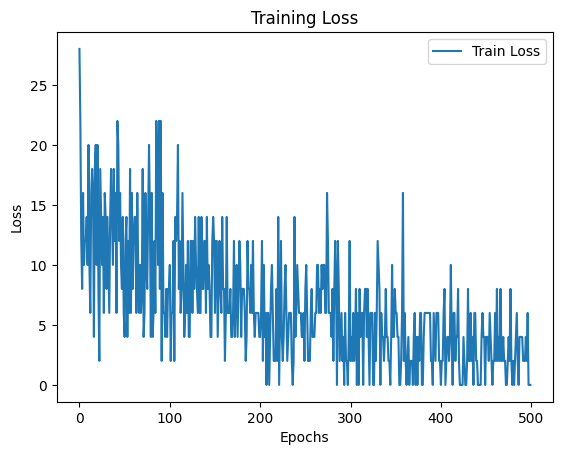

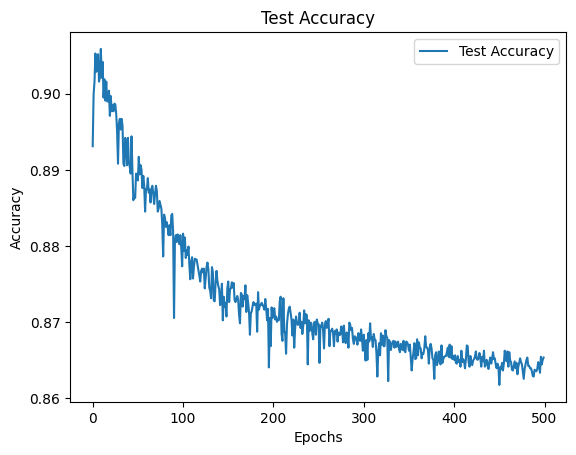

Training time: 238.60 seconds


In [ ]:
batch_size = 100
num_iterations = 500

# Define the training dataset sizes to experiment with
train_sizes = [100, 500, 1000, 10000]

for train_size in train_sizes:
    # Randomly sample a subset of the training dataset
    idx = np.random.choice(len(train_data), train_size, replace=False)
    train_data_subset = train_data[idx]
    train_labels_subset = train_labels[idx]
    
    # Train the model using minibatch SGD
    print(f"Experimenting with training dataset size {train_size}")
    start_time = time.time()
    W = mb_sgd(train_data_subset, train_labels_subset, batch_size, 0.001, num_iterations, W)
    end_time = time.time()
    print(f"Training time: {end_time - start_time:.2f} seconds")

TASK 6: Simpler Life: Run the linear MNIST classifier with batchsize B = 100 over the full dataset by using PyTorch or Tensorflow. Use same learning rate and initialization W0 = 0. Verify that it is consistent with your handcoded algorithm by comparing your results (the accuracy and training loss plots).

Below ive implemeted sgd using torchvision inbuilt classifiers. As you can you see the inbuilt classifier has a better plot for the accuracy with an increasing curve and the loss decreases as the number of iteration rate increases.

In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 9912422/9912422 [00:00<00:00, 364795220.18it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 95759441.76it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 165769208.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9366041.68it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/75], Train Loss: 1.1796, Train Accuracy: 69.98%, Test Accuracy: 84.26%
Epoch [2/75], Train Loss: 0.6318, Train Accuracy: 85.11%, Test Accuracy: 86.88%
Epoch [3/75], Train Loss: 0.5253, Train Accuracy: 86.80%, Test Accuracy: 88.14%
Epoch [4/75], Train Loss: 0.4748, Train Accuracy: 87.69%, Test Accuracy: 88.75%
Epoch [5/75], Train Loss: 0.4443, Train Accuracy: 88.23%, Test Accuracy: 89.11%
Epoch [6/75], Train Loss: 0.4233, Train Accuracy: 88.60%, Test Accuracy: 89.46%
Epoch [7/75], Train Loss: 0.4078, Train Accuracy: 88.90%, Test Accuracy: 89.63%
Epoch [8/75], Train Loss: 0.3957, Train Accuracy: 89.15%, Test Accuracy: 90.01%
Epoch [9/75], Train Loss: 0.3860, Train Accuracy: 89.35%, Test Accuracy: 90.08%
Epoch [10/75], Train Loss: 0.3779, Train Accuracy: 89.53%, Test Accuracy: 90.24%
Epoch [11/75], Train Loss: 0.3710, Train Accuracy: 89.67%, Test Accuracy: 90.28%
Epoch [12/75], Train Loss: 0.3651, Train Ac

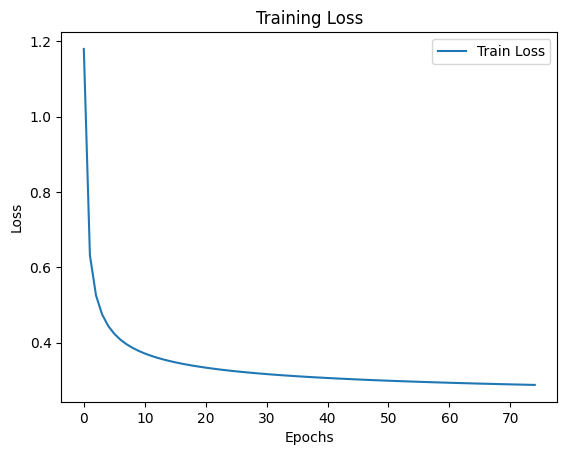

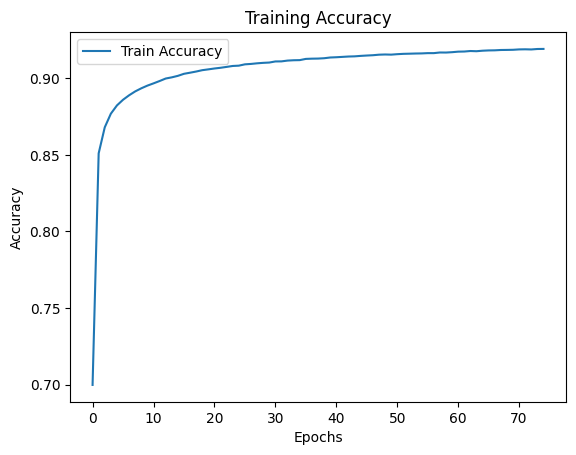

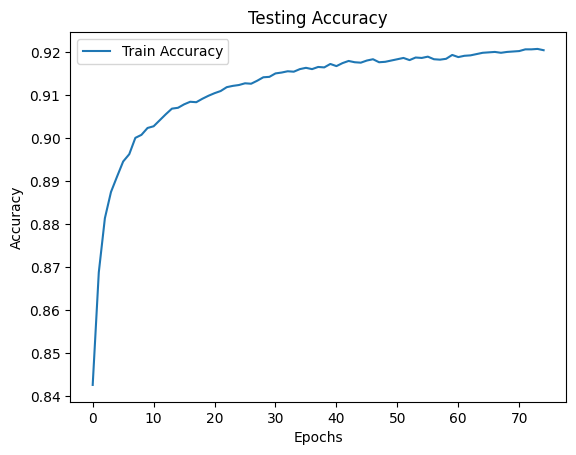

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


batch_size = 100
learning_rate = 0.001
num_epochs = 75


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = nn.Linear(784, 10).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


train_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_total = 0
    epoch_correct = 0
    
    for images, labels in train_loader:

        images = images.view(-1, 784).to(device)
        labels = labels.to(device)
        

        optimizer.zero_grad()
        

        outputs = model(images)
        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()
        

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        epoch_total += labels.size(0)
        epoch_correct += (predicted == labels).sum().item()
    

    train_loss = epoch_loss / len(train_loader)
    train_acc = epoch_correct / epoch_total
    

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:

            images = images.view(-1, 784).to(device)
            labels = labels.to(device)
            

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        test_acc = correct / total
    

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    

    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy: {:.2%}, Test Accuracy: {:.2%}'
          .format(epoch+1, num_epochs, train_loss, train_acc, test_acc))


import matplotlib.pyplot as plt

plt.plot(range(num_epochs) , train_loss_list, label='Train Loss')
plt.legend()
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(range(num_epochs) , train_acc_list, label='Train Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(range(num_epochs) , test_acc_list, label='Train Accuracy')
plt.legend()
plt.title('Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

